<a href="https://colab.research.google.com/github/khashayard/Heart-Disease-Prediction-Machine-Learning/blob/main/Predicting_heart_disease_using_machine_learning_and_deep_neural_network_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense ,Input , Dropout,BatchNormalization


# 📥 Uploading Data
In this section, we are uploading the dataset file using Google Colab's `files.upload()` function. This will allow us to select and load the CSV file into the environment for further analysis.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


# 📝 Loading and Previewing Data
In this section, we load the dataset from a CSV file into a pandas DataFrame. After loading the data, we preview the first 10 rows to get a quick look at the dataset and understand its structure.


In [7]:
df = pd.read_csv('heart.csv')
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# 📊 Data Exploration
In this section, we perform some initial exploratory data analysis (EDA) to understand the structure of the dataset.
We are checking the shape, info, columns, and missing values of the dataset to ensure everything is in order before moving forward with the analysis.




In [160]:

print(f'Data shape: {df.shape}')
print('-----------------')
print('Data info:')
df.info()
print('-----------------')
print(f'Data columns: {df.columns.tolist()}')
print('-----------------')
print('Missing values per column:')
print(df.isna().sum())


-----------------
Data shape: (1025, 14)
-----------------
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
-----------------
Data columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', '

# 🔍 Target vs Sex Distribution (Matplotlib)
In this plot, we are visualizing the distribution of the target variable with respect to the "sex" feature using a bar plot in `matplotlib`. This helps us to understand how the target variable (heart disease) is distributed across different sexes.


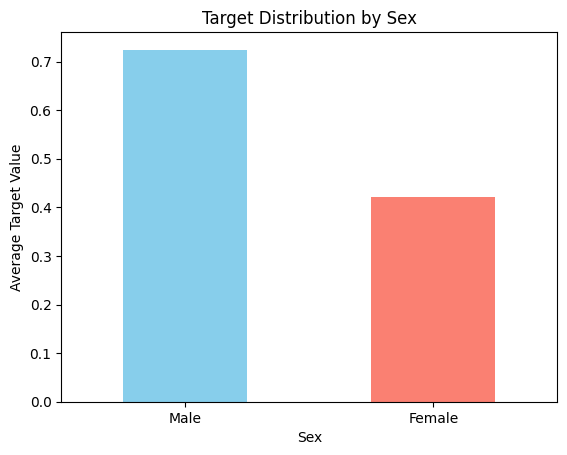

In [176]:
import matplotlib.pyplot as plt

# Bar plot for target vs sex distribution
sex_target = df.groupby("sex")["target"].mean()
sex_target.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Target Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Target Value")
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()


# 🎻 Violin Plot for Target vs Cholesterol
A violin plot is used to compare the distribution of "chol" (cholesterol levels) for each class of the target variable. This plot provides a better view of the data distribution and density.


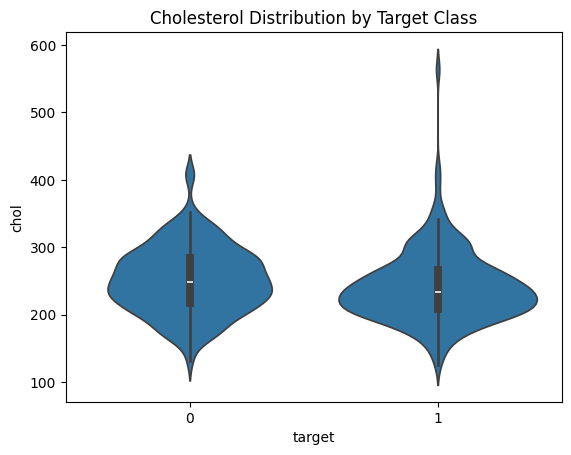

In [172]:
sns.violinplot(x="target", y="chol", data=df)
plt.title('Cholesterol Distribution by Target Class')
plt.show()

# 🔵 Scatter Plot of Thalach vs Age
A scatter plot helps visualize the relationship between "thalach" (maximum heart rate achieved) and "age". We also color the points by the target variable to distinguish between heart disease presence and absence.


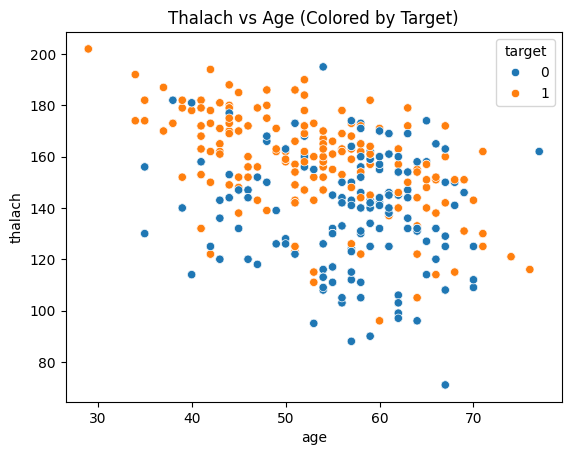

In [174]:
sns.scatterplot(x="age", y="thalach", hue="target", data=df)
plt.title('Thalach vs Age (Colored by Target)')
plt.show()

# 🔥 Correlation Heatmap (Matplotlib)
In this plot, we visualize the correlation between numerical features using a heatmap. This allows us to identify strong relationships between different features and the target variable.


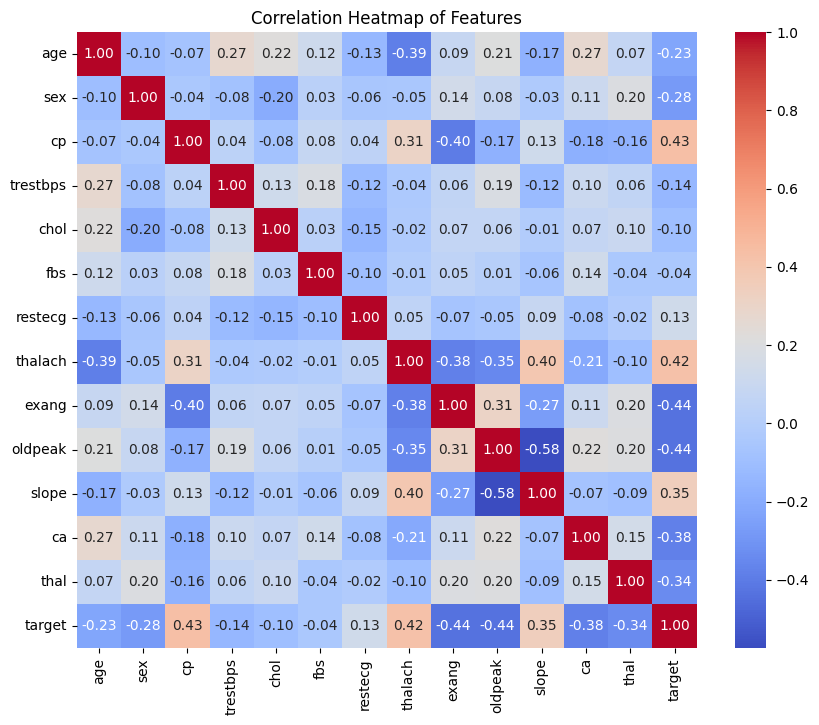

In [178]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


# 🔍 Pairplot for Target Classes and Feature Relationships (Matplotlib)
In this plot, we create a pairplot of the first 500 rows of the dataset, colored by the target variable (`'target'`). This will help us visually inspect the pairwise relationships between the features, while also understanding how different features behave within each class of the target variable.


<Figure size 1800x800 with 0 Axes>

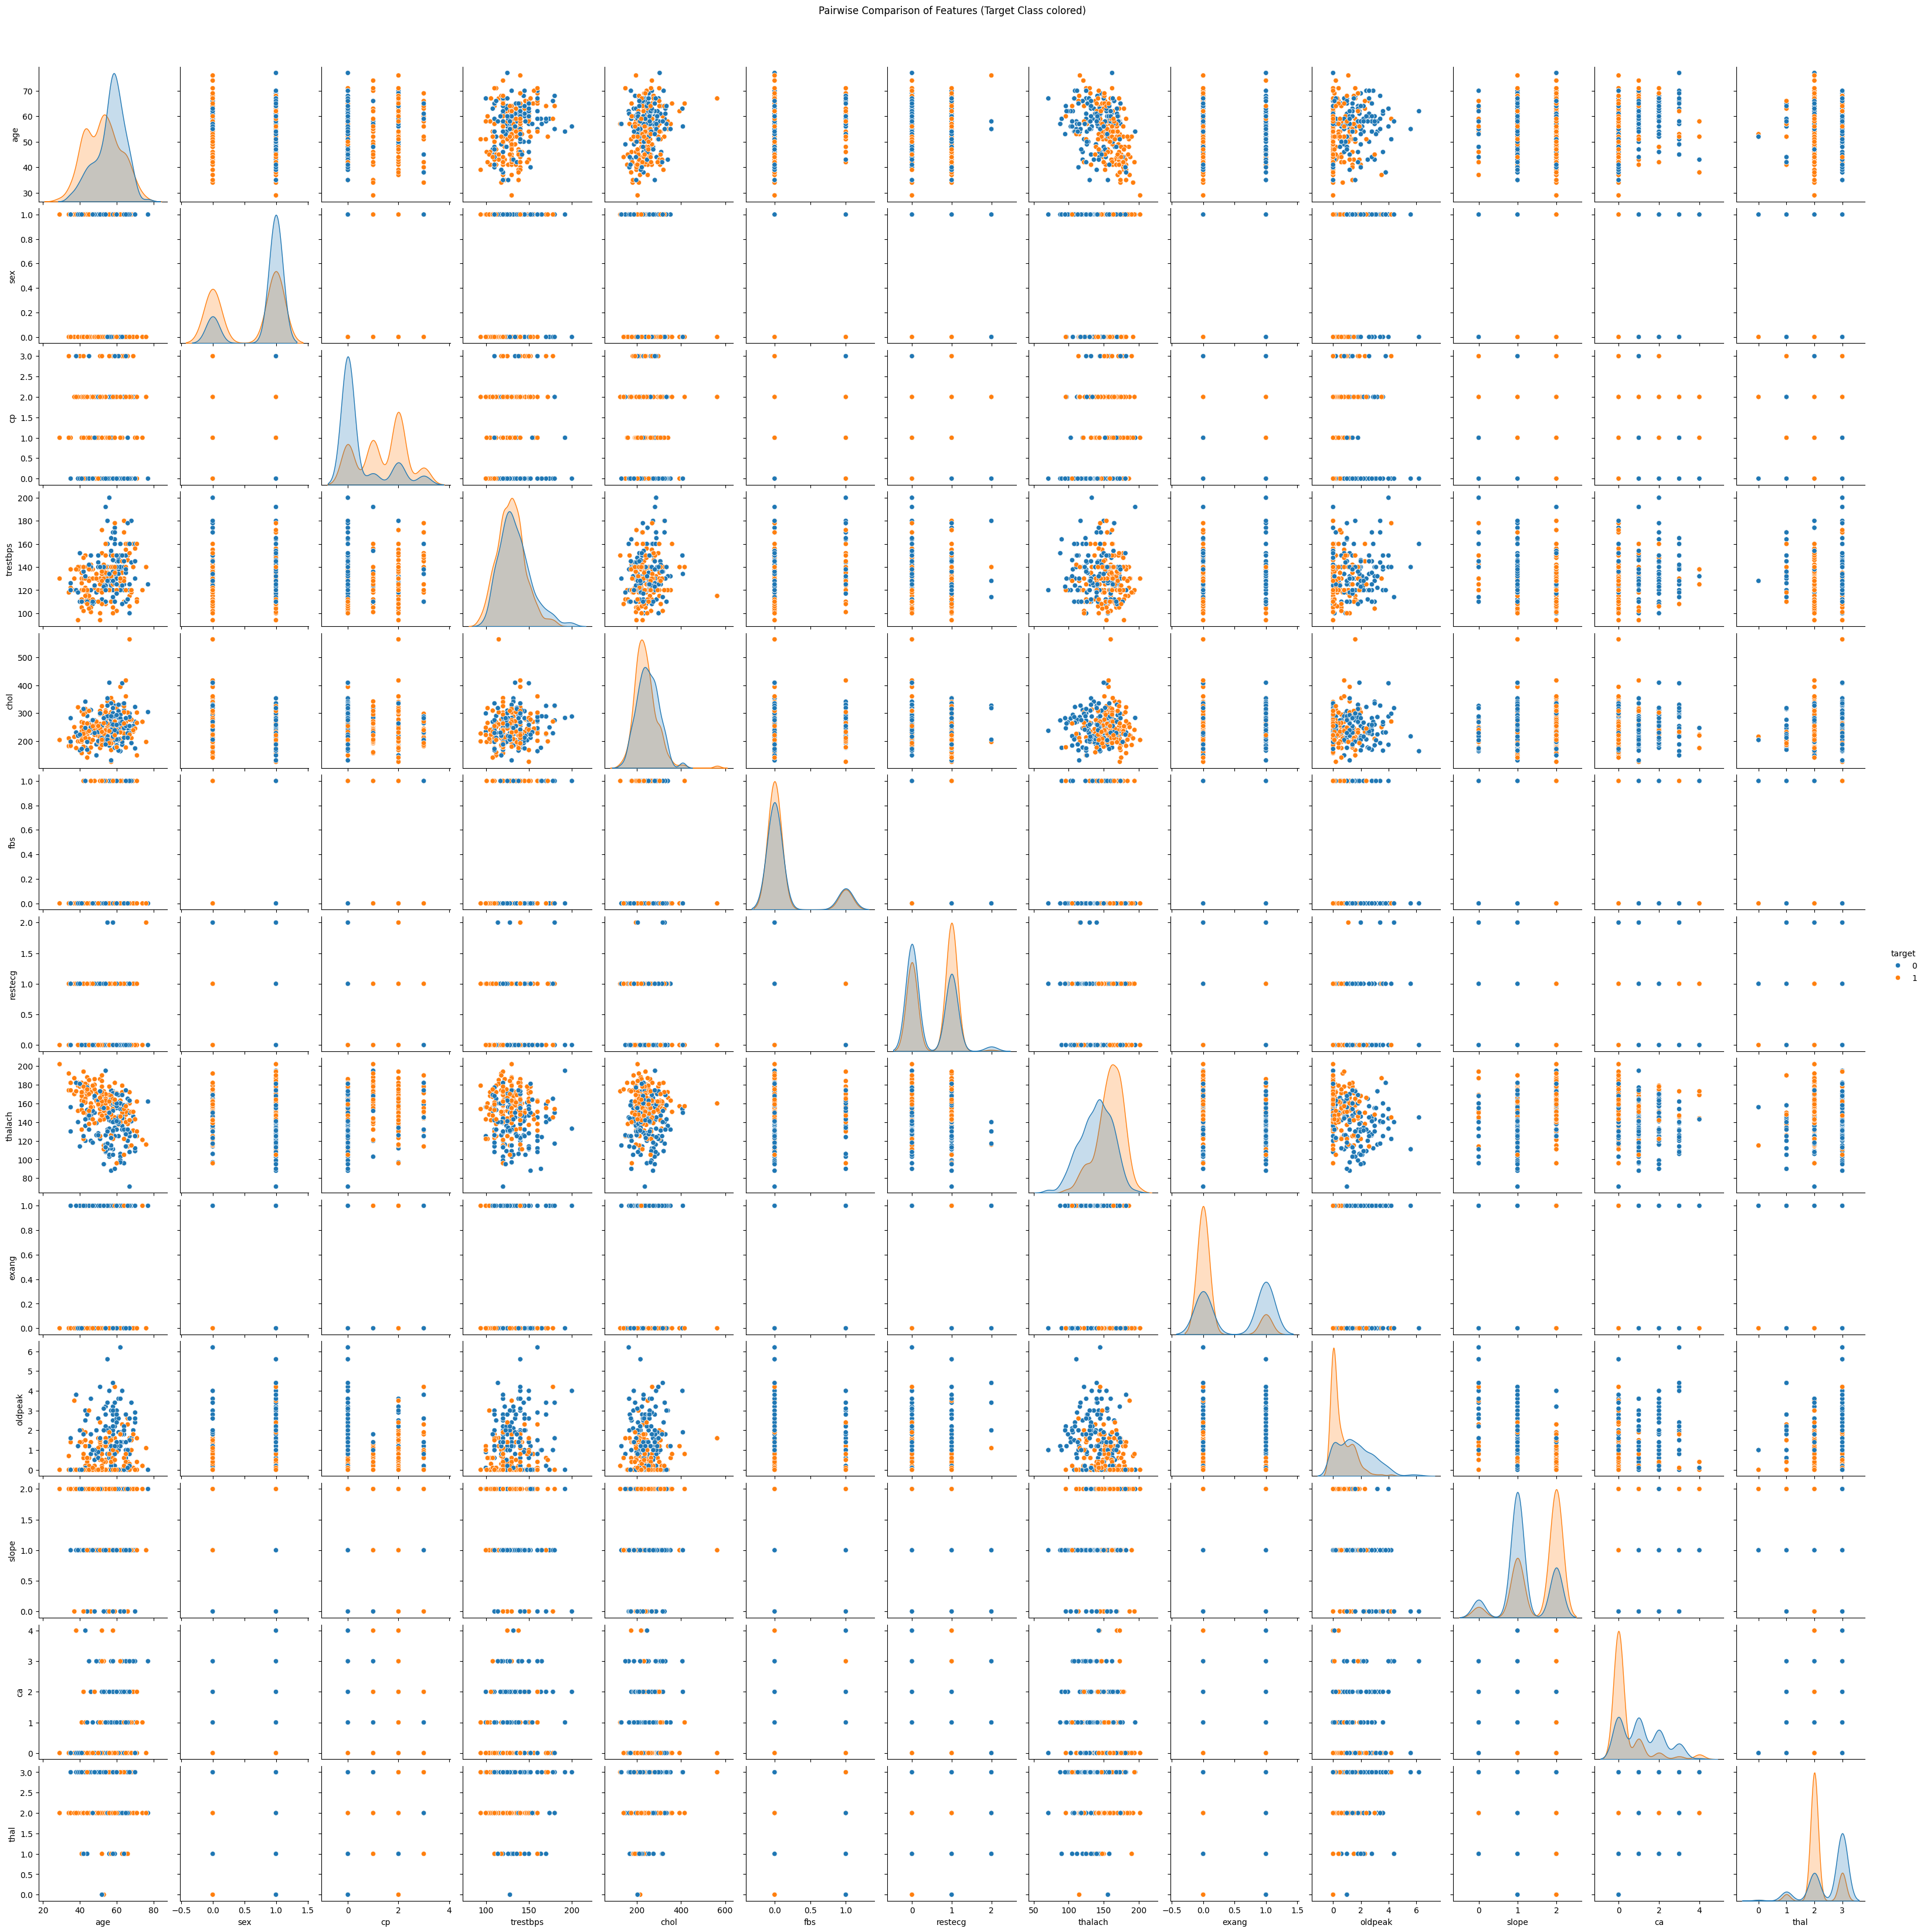

In [180]:
plt.figure(figsize=(18, 8), dpi=100)
sns.pairplot(df, hue='target')
plt.suptitle('Pairwise Comparison of Features (Target Class colored)', y=1.02)
plt.show()

# ⚙️ Data Preprocessing and Feature Scaling
In this section, we:
- Define the input features `X` and the target variable `y`.
- Split the data into training and testing sets with an 80/20 ratio while preserving the class distribution using `stratify`.
- Apply standardization using `StandardScaler` to ensure features have zero mean and unit variance, which helps many machine learning algorithms perform better.


In [181]:

x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = np.array(df['target'])

print(f'X shape: {x.shape} \nY shape: {y.shape}')

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print('--------------')
print(f'x_train: {x_train.shape}\n x_test: {x_test.shape}')
print('--------------')
print(x_train[:10])


X shape: (1025, 13) 
Y shape: (1025,)
--------------
x_train: (820, 13)
 x_test: (205, 13)
--------------
[[ 0.81162633 -1.50996689 -0.90957214  0.31472862  0.89579058  2.34689934
   0.926946   -1.92115501 -0.71813066  0.69652503 -0.59754229  2.20730061
  -0.56245085]
 [ 0.15224695 -1.50996689 -0.90957214  3.76764257  0.77911537  2.34689934
  -0.98284224 -0.72536159  1.39250426  2.47581015 -2.1987994   1.22840039
   1.0906305 ]
 [ 0.26214351  0.66226618  1.04803719 -0.24219298 -0.36819094 -0.42609412
  -0.98284224  0.02754538 -0.71813066 -0.57439291 -0.59754229  0.24950018
   1.0906305 ]
 [ 0.26214351  0.66226618  1.04803719  0.98303455 -2.37111551  2.34689934
   0.926946    1.04618421 -0.71813066 -0.74384864  1.00371482  0.24950018
   1.0906305 ]
 [-0.28733931 -1.50996689  1.04803719  0.2033443  -1.00990464 -0.42609412
  -0.98284224  0.86902963 -0.71813066 -0.8285765  -0.59754229 -0.72940004
  -0.56245085]
 [ 0.92152289 -1.50996689 -0.90957214 -1.35603619  0.40964384 -0.42609412
   0.

# 🤖 Model Setup and Hyperparameter Tuning Configuration
In this step:
- We define three classification models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Logistic Regression.
- For each model, we also define a grid of hyperparameters to be used in `GridSearchCV` for model tuning.


In [74]:

name_model = {
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'logistic': LogisticRegression(max_iter=1000)
}

param_grids = {
    'knn': {
        'n_neighbors': [3, 5, 7,9],
        'weights': ['uniform', 'distance']
    },
    'svm': {
        'kernel': ['rbf', 'linear'],
        'C': list(range(1, 11)),
        'gamma': ['scale', 'auto']
    },
    'logistic': {
        'C': list(range(1, 11)),
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs']
    }
}

# 🔍 Hyperparameter Optimization using GridSearchCV
In this section, we:
- Iterate over each classification model.
- Perform hyperparameter tuning using `GridSearchCV` with 5-fold cross-validation.
- Collect the best parameters and scores for each model.
- Measure the time taken for tuning each model.

This helps in selecting the most optimal settings to improve classification performance.


In [75]:
param=[]
for name, model in name_model.items():
    print(f"\nModel: {name.upper()}")
    start = time.time()

    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    end = time.time()

    print("Best Estimator:", grid.best_estimator_)
    print("Best Params:", grid.best_params_)
    print("Best Score:", grid.best_score_)
    print(f"Time Taken: {end - start:.2f} seconds")
    print("-" * 40)
    param.append(grid.best_params_)

print(param)


Model: KNN
Best Estimator: KNeighborsClassifier(n_neighbors=9, weights='distance')
Best Params: {'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.9890243902439024
Time Taken: 0.43 seconds
----------------------------------------

Model: SVM
Best Estimator: SVC(C=10, gamma='auto')
Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.978048780487805
Time Taken: 7.67 seconds
----------------------------------------

Model: LOGISTIC
Best Estimator: LogisticRegression(C=1, max_iter=1000, solver='liblinear')
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8439024390243903
Time Taken: 0.35 seconds
----------------------------------------
[{'n_neighbors': 9, 'weights': 'distance'}, {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}]


# 🧪 Model Training and Evaluation
In this section:
- Each classifier is initialized with the best hyperparameters found previously.
- Models are trained on the training set and evaluated on the test set.
- We print out the classification report and confusion matrix for each model, showing metrics such as precision, recall, f1-score, and overall accuracy.
This allows a clear comparison of each model's performance on unseen data.


In [182]:
models = name_model = {
    'knn': KNeighborsClassifier(**param[0]),
    'svm': SVC(**param[1]),
    'logistic': LogisticRegression(**param[2])
}

def run_model (x_train , y_train ,x_test , y_test):
  global models
  for keys, model in models.items():
    model.fit(x_train , y_train )
    model.score(x_train , y_train )
    model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print(f'model_name :{keys}')
    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))
    print('-----------------Next Models-----------------')



# 🤖 Deep Learning Model with TensorFlow/Keras
In this part:
- A sequential neural network is created with three dense hidden layers and dropout for regularization.
- The input shape is set to 13 features (same as the dataset).
- `softmax` is used in the output layer since we have two classes and are using `sparse_categorical_crossentropy` loss.
- The learning rate is scheduled to increase exponentially during training using `LearningRateScheduler`.
- The model is trained for 40 epochs with 20% of the training data reserved for validation.


In [194]:
tf.random.set_seed(41)

model =Sequential([
  Input(shape=(13,)),
  Dense(100, activation='relu'),
  Dropout(0.5),
  Dense(60, activation='relu'),
  Dropout(0.5),
  Dense(35, activation='relu'),
  Dense(2, activation='softmax')
])
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
hisotry=model.fit(x_train , y_train,epochs=40,validation_split=0.2,batch_size=32,callbacks=[lr_scheduler])


Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4856 - loss: 0.7949 - val_accuracy: 0.3963 - val_loss: 0.7190 - learning_rate: 1.0000e-04
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4804 - loss: 0.7673 - val_accuracy: 0.5061 - val_loss: 0.6955 - learning_rate: 1.1220e-04
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5461 - loss: 0.6978 - val_accuracy: 0.5976 - val_loss: 0.6735 - learning_rate: 1.2589e-04
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4902 - loss: 0.7201 - val_accuracy: 0.7134 - val_loss: 0.6527 - learning_rate: 1.4125e-04
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6210 - loss: 0.6781 - val_accuracy: 0.7561 - val_loss: 0.6327 - learning_rate: 1.5849e-04
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6183 - loss: 0.6498 - val_accuracy: 0.7622 - val_loss: 0.6136 - learning_rate: 1.7783e-04
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6149 

### 📉 Plotting Loss vs Learning Rate

In this cell, we visualize how the training loss changes as the learning rate increases exponentially.  
This helps identify the **optimal learning rate** — the value where the loss starts to drop rapidly before it begins to increase again.

We use a semilog plot to better visualize the learning rate scale.  
A vertical red dashed line indicates the manually selected optimal learning rate (in this case, `0.001`).


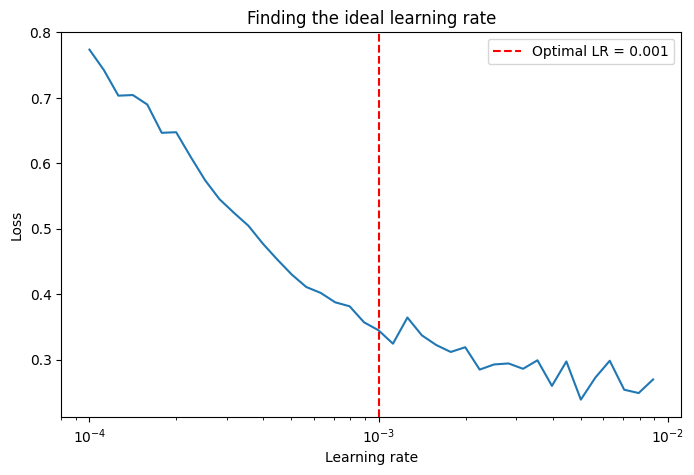

In [197]:
lrs = 1e-4 * (10**(np.arange(40)/20))
losses = hisotry.history["loss"]

plt.figure(figsize=(8,5))
plt.semilogx(lrs, losses)
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

optimal_lr = 0.001
plt.axvline(optimal_lr, color='red', linestyle='--', label=f'Optimal LR = {optimal_lr}')
plt.legend()
plt.show()

### 🧠 Building an Enhanced Neural Network with Batch Normalization & Dropout

In this cell, we define and train a more advanced neural network using TensorFlow/Keras:

- **Batch Normalization** is applied after dense layers to stabilize and accelerate training.
- **Dropout** is used before the final layer to reduce overfitting by randomly dropping units during training.
- The model ends with a softmax layer for binary classification (2 classes).
- We compile the model with:
  - Loss: `sparse_categorical_crossentropy` (used for integer labels).
  - Optimizer: `Adam` with a custom learning rate `0.0013`.
- The model is trained for **40 epochs** with **20% validation split**.

This design aims to improve generalization and training stability.




In [199]:

tf.random.set_seed(42)

model1 =Sequential([
    Input(shape=(13,)),
    Dense(120,activation='relu',use_bias=False),
    BatchNormalization(),
    Dense(70,activation='relu',use_bias=False),
    BatchNormalization(),
    Dense(25,activation='relu',use_bias=False),
    Dropout(0.5),
    Dense(2,activation='softmax')
])
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.0013),metrics=['accuracy'])
history1=model1.fit(x_train , y_train,epochs=40,validation_split=0.2,batch_size=32)

Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6292 - loss: 0.7827 - val_accuracy: 0.7988 - val_loss: 0.5646
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8404 - loss: 0.3353 - val_accuracy: 0.8415 - val_loss: 0.5046
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8824 - loss: 0.2780 - val_accuracy: 0.8171 - val_loss: 0.4579
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8948 - loss: 0.2604 - val_accuracy: 0.8232 - val_loss: 0.4222
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9174 - loss: 0.2042 - val_accuracy: 0.8293 - val_loss: 0.3818
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9314 - loss: 0.1648 - val_accuracy: 0.8415 - val_loss: 0.3399
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.1553 - val_accuracy: 0.8598 - val_loss: 0.3042
Epoch 8/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9629 - loss: 0.1257 - val_accuracy: 0.8720 - val_loss

### 📊 Evaluating Model Performance & Plotting Training History

- **Model Evaluation**: We evaluate the performance of the trained model on the test set (`x_test`, `y_test`) to assess its accuracy and loss.
- **Training History Plot**: The training and validation accuracy, as well as the loss, are plotted over the epochs to visualize the model's learning progress and potential overfitting or underfitting trends.

This helps us understand how well the model generalizes to unseen data.




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0060 


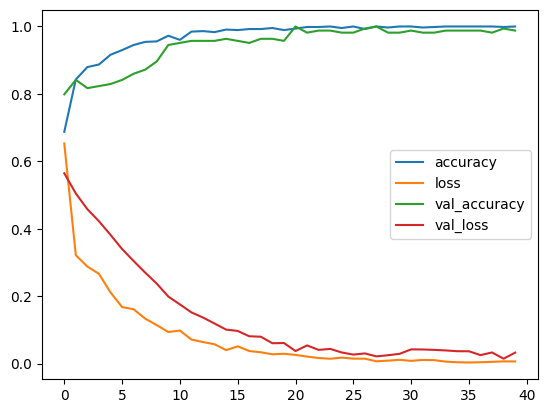

In [200]:
model1.evaluate(x_test, y_test)
pd.DataFrame(history1.history).plot()
plt.show()

### 🧠 Making Predictions with Keras Model & Evaluating Performance

- **Prediction**: We use the trained `model1` to make predictions on the test set (`x_test`). The predicted values are processed by selecting the class with the highest probability using `argmax`.
- **Model Evaluation**: The function `run_model()` is used to evaluate other machine learning models. Additionally, we generate and print the classification report and confusion matrix to assess the performance of the Keras model.

The classification report provides insights into precision, recall, f1-score, and accuracy for each class, while the confusion matrix shows the true positives, false positives, true negatives, and false negatives.



In [158]:
y_pred=model1.predict(x_test)
y_pred=y_pred.argmax(axis=1)
run_model (x_train , y_train ,x_test , y_test)
print('-----------------keras model-----------------')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

model_name :knn
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

[[ 98   2]
 [  2 103]]
-----------------Next Models-----------------
model_name :svm
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

[[ 97   3]
 [  1 104]]
-----------------Next Models-----------------
model_name :logistic
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       100
           1       0.83      0.89      0.86   